# <font color='#eb3483'> Data Wrangling - Time Series </font>
In this module we explore a special type of data - time series (a.k.a. data related to times or dates). Time series data is pretty ubiquitous. Think of the stock market, weather data, or even your own bank statements - it's all data tied to specific dates and times. Dates and times deserve some extra special attention during your data wrangling process because they have some unique properties. Like numeric data they have a natural ordering (i.e. 3pm is after 2pm), but they also have additional structure (i.e. for a given time we have an hour, a day of the week, a year, a zodiac sign...etc.). 

This notebook first looks at how Python stores date/time data, and then dives deep into some cool functionality pandas has to play around with this data. 



## <font color='#eb3483'> Datetime</font>
We'll start by looking at python's basic way to deal with dates - the datetime object. We can load datetime functionality using the `datetime` package, and create a new datetime variable.

In [1]:
from datetime import datetime, date #importing the datetime type from the datetime package (I know ... it's confusing!)

#Let's make a date for July 1st 2020 (Canada day!)
canada_day = datetime(year=2020, month =7, day=1)
canada_day

datetime.datetime(2020, 7, 1, 0, 0)

Notice that our datetime object has stored our year month and day. We can index to retrieve those variables using the same dot notation we've used in pandas.

In [2]:
canada_day.year

2020

We can also specify a time for our date.

In [3]:
canada_day = datetime(year=2020, month =7, day=1, hour =13, minute = 30)
canada_day.hour

13

We can use the strftime (STRing Format TIME) method included with our datetime objects to print out our date as a nice string. We specify what we want our output string to look like by using special 'directives' (`%` followed by a letter). Think of directives as instructions (i.e. `%d` says put the day here), you can check out the plethora of formatting options [here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [4]:
#This is saying I want the string version of our date with
#%B - the month (full name)
#%d - the day (number)
#%Y - the year
#I've also thrown in a comma to make it look snazzy
canada_day.strftime('%B %d, %Y')

'July 01, 2020'

In [5]:
#We can also go classic and do the American slash M/D/Y format
canada_day.strftime('%m/%d/%Y')

'07/01/2020'

Datetime also has some handy functions that conveniently grab the current date/time.

In [6]:
print('Right now:', datetime.now())
print("Today's date:", date.today())

Right now: 2021-05-26 16:36:06.555506
Today's date: 2021-05-26


Note that we're using the date object from datetime in the last line. Same idea as datetime but no time (can be handy when you only care about the day and not specific time). One of the cool things about working with dates in datetime objects is we can add and subtract dates - let's see how far Canada day is from fourth of july.

In [7]:
#Let's create a new datetime - the fourth of july for the yankees out there
fourth_of_july = datetime(year=2020, month =7, day=4)

#How far is fourth of july from canada day?
holiday_difference = fourth_of_july - canada_day
print('How far after canada day is fourth of july?', holiday_difference)
print('Type of subtracted dates:', type(holiday_difference))

How far after canada day is fourth of july? 2 days, 10:30:00
Type of subtracted dates: <class 'datetime.timedelta'>


You'll notice that when we add/subtract dates we get a new type of object: timedelta. It's what you would expect - a variable that stores the length of time between datetimes. We can even index into it and get the number of days in our timedelta.

In [8]:
holiday_difference.days

2

### <font color='#eb3483'> Quick Knowledge Check</font>
1. Create a new datetime object for your next birthday. Print it out as a string with your choice of formatting (play around with different options!)

In [10]:
b_day = datetime(year = 2021, month = 9, day = 13)
print(b_day)

2021-09-13 00:00:00


2. Calculate how many days away your birthday is from the current date.

In [11]:
print(b_day - datetime.now())

109 days, 7:22:31.859771


## <font color='#eb3483'> Datetimes in Pandas </font>
Datetime objects are great for individual dates (and provide a lot of flexibility/ease of use), but don't scale well to vectors of dates (i.e. columns in a dataframe). For that it's time to turn to our favorite coding bears - pandas! 

In [12]:
import pandas as pd

### <font color='#eb3483'>Timestamps  </font>

The timestamp is the most basic form of time series data that Pandas has. It does exactly what the name describes: marks the exact moment in which the data was collected. 

While kaggle datasets and other online challenges are normally clean "hourly" or "daily" dataset, TimeStamps are how most data is normally collected in the wild! 

An event happens, and the time of the event is dumped into a database. 

One example of this would be... bitcoin! Now, whatever you may think about bitcoin, it is an excellent source of high-granularity data. Let's dive in! 

In [13]:
data = pd.read_csv('./data/bitcoin.csv')

In [14]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2017-01-01 00:00:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
1,2017-01-01 00:01:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2,2017-01-01 00:02:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
3,2017-01-01 00:03:00,973.36,973.36,973.36,973.36,0.040000,38.934400,973.360000
4,2017-01-01 00:04:00,973.36,973.40,973.36,973.39,5.458800,5313.529708,973.387871


In [15]:
data.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
647996,2018-03-26 23:56:00,8155.00,8155.00,8154.99,8154.99,0.617945,5039.342643,8154.997667
647997,2018-03-26 23:57:00,8154.99,8154.99,8154.00,8154.01,40.655410,331543.193980,8154.958865
647998,2018-03-26 23:58:00,8154.00,8154.01,8150.00,8150.00,9.856911,80340.432933,8150.670628
647999,2018-03-26 23:59:00,8150.01,8150.01,8122.82,8145.00,68.274269,555026.852280,8129.370847
648000,2018-03-27 00:00:00,8144.99,8145.01,8140.00,8140.00,37.842674,308202.442620,8144.309384


Interesting. We have this `Timestamp` column, that we can kind of parse by looking at it. 

In [16]:
data.Timestamp.head()

0    2017-01-01 00:00:00
1    2017-01-01 00:01:00
2    2017-01-01 00:02:00
3    2017-01-01 00:03:00
4    2017-01-01 00:04:00
Name: Timestamp, dtype: object

We can kind of understand this. Looks like Year, month, and day, then hours, minutes, then seconds ...  

Let's inspect a random row: 

In [17]:
print('One of the times in our dataset: %s' % data.Timestamp.iloc[3])
print('Type of the Series (data.Time):  %s' % data.Timestamp.dtype)
print('Type of a particular time:       %s' % type(data.Timestamp.iloc[3]))

One of the times in our dataset: 2017-01-01 00:03:00
Type of the Series (data.Time):  object
Type of a particular time:       <class 'str'>


We can use `pd.to_datetime` to parse the timestamps

In [18]:
time_as_a_timestamp = pd.to_datetime(data.Timestamp, infer_datetime_format=True)

What is it now? 

In [20]:
time_as_a_timestamp.head(2)

0   2017-01-01 00:00:00
1   2017-01-01 00:01:00
Name: Timestamp, dtype: datetime64[ns]

Now the column is in `datetime[ns]` format! That means the column is a timestamp (with precission in nanoseconds)

Now we can compute statistics with it!

In [21]:
time_as_a_timestamp.min()

Timestamp('2017-01-01 00:00:00')

In [22]:
time_as_a_timestamp.max()

Timestamp('2018-03-27 00:00:00')

Now we can extract days, months etcetera:

In [23]:
time_as_a_timestamp.dt.day.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Timestamp, dtype: int64

because the column is a timestamp dtype, it has the `.dt` accessor with all of the timestamp related functions. Since pandas was created for stock trading data (which are timeseries), [there are lot of timestamp specific properties!](https://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties)

Let's make a toy dataset so that we can see some of the results side by side

In [24]:
new = pd.DataFrame()
new['date'] = time_as_a_timestamp
new['day'] = new['date'].dt.day
new['month'] = new['date'].dt.month
new['year'] = new['date'].dt.year
new['hour'] = new['date'].dt.hour
new['minute'] = new['date'].dt.minute
new['second'] = new['date'].dt.second
new['day of the week'] = new['date'].dt.weekday
new['quarter'] = new['date'].dt.quarter
new['is it a leap year?'] = new['date'].dt.is_leap_year

new.head(2)

,date,day,month,year,hour,minute,second,day of the week,quarter,is it a leap year?
0,2017-01-01 00:00:00,1,1,2017,0,0,0,6,1,False
1,2017-01-01 00:01:00,1,1,2017,0,1,0,6,1,False


Pandas... is amazing. 

### <font color='#eb3483'> Different date formats  </font>

Now you may be thinking _"hang on, was that just because the strings were exactly in the way Pandas likes them?"_

It's a fair question, and the answer is No. Pandas' [`to_datetime`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) has an `infer_datetime_format` argument which is amazingly good, and can for the most part figure out what you need from it. 

Let's put it to the test: 

In [26]:
# little function to sanity check our dates
def sanity_check(dates):
    # go ahead Pandas, guess my date format! 
    inferred_dates = pd.to_datetime(dates, infer_datetime_format=True)
    
    # Print out the results 
    print('Our first day is   5,    and was infered as %0.0f' % inferred_dates.iloc[0].day)
    print('Our first month is 4,    and was infered as %0.0f' % inferred_dates.iloc[0].month)
    print('Our first year is  2007, and was infered as %0.0f' % inferred_dates.iloc[0].year)

Let's start with an easy one 

In [27]:
american_dates = pd.Series(['04/05/2007',  # <-- April 5th, 2007
                            '04/13/2006', 
                            '12/27/2014'])

sanity_check(american_dates)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


Can we separate them with hyphens? 

In [28]:
hyphen_separated_dates = pd.Series(['04-05-2007',  # <-- April 5th, 2007
                            '04-13-2006', 
                            '12-27-2014'])

sanity_check(hyphen_separated_dates)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


Let's write the year in a weird way

In [29]:
short_year = pd.Series(['04-05-07',  # <-- April 5th, 2007
                        '04-13-06', 
                        '12-27-14'])

sanity_check(short_year)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


Eh... english? 

In [30]:
dates_in_english = pd.Series(['April 5th, 2007',  # <-- April 5th, 2007
                            'April 13th, 2006', 
                            'December 27th, 2014'])

sanity_check(dates_in_english)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


Wow! So, european dates should be easy... right? 

In [31]:
european_dates = pd.Series(['05/04/2007',   # <-- April 5th, 2007
                            '13/04/2006', 
                            '27/12/2014'])

sanity_check(european_dates)

Our first day is   5,    and was infered as 4
Our first month is 4,    and was infered as 5
Our first year is  2007, and was infered as 2007


Wait... what? It got the day and month mixed up! 

It turns out Pandas can infer lots of things, but Europe isn't it's strenght. Even though the second and third line clearly indicate that the month is in the middle (the 13'th can't be a month), it still gets confused. 

And here is where line 2 of [The Zen of Python](https://www.python.org/dev/peps/pep-0020/#id3) comes in:
> Explicit is better than implicit 

In [32]:
inferred_dates = pd.to_datetime(european_dates, 
                                dayfirst=True)  # <--- explicit! 

In [33]:
print('Our first day is   5,    and was infered as %0.0f' % inferred_dates.iloc[0].day)
print('Our first month is 4,    and was infered as %0.0f' % inferred_dates.iloc[0].month)
print('Our first year is  2007, and was infered as %0.0f' % inferred_dates.iloc[0].year)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


By being explicit, we can parse arbitrarily crazy dates, following python [date string formatting syntax](http://strftime.org/):

In [34]:
dates_in_quackland = pd.Series(['05_quack_2007$04',   # <-- April 5th, 2007, in quack_timesystem
                                '13_quack_2006$04',    
                                '27_quack_2014$12'])

inferred_dates = pd.to_datetime(dates_in_quackland, 
                                format='%d_quack_%Y$%m')  # <--- %d is day, %m is month, %Y is 4 digit year

print('Our first day is   5,    and was infered as %0.0f' % inferred_dates.iloc[0].day)
print('Our first month is 4,    and was infered as %0.0f' % inferred_dates.iloc[0].month)
print('Our first year is  2007, and was infered as %0.0f' % inferred_dates.iloc[0].year)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


### <font color='#eb3483'> Quick Knowledge Check</font>
1. Time to practice converting some dates! Write code that converts the following series into datetimes columns.

In [43]:
canadian_dates = pd.Series(['July 24, 2020 eh!',
                           'October 6, 2020 eh!',
                           'January 3, 2019 eh!',])

#Convert the canadian dates series here 
inferred_dates = pd.to_datetime(canadian_dates, 
                                format='%B %d, %Y eh!')  # <--- %d is day, %m is month, %Y is 4 digit year

print('Our first day is   24,    and was infered as %0.0f' % inferred_dates.iloc[0].day)
print('Our first month is 7,    and was infered as %0.0f' % inferred_dates.iloc[0].month)
print('Our first year is  2020, and was infered as %0.0f' % inferred_dates.iloc[0].year)

Our first day is   24,    and was infered as 24
Our first month is 7,    and was infered as 7
Our first year is  2020, and was infered as 2020


In [45]:
#Note that the first two digit number is month (you can tell because the second one >12)
farm_dates = pd.Series(['Oink 2020 Moo 12 Baa 18 Cluck 14:00',
                        'Oink 2020 Moo 2 Baa 3 Cluck 1:00',
                        'Oink 2004 Moo 7 Baa 9 Cluck 21:00'])
#Convert the farm dates series here 
inferred_dates = pd.to_datetime(farm_dates, 
                                format='Oink %Y Moo %m Baa %d Cluck %M:%S')

print('Our first day is   18,    and was infered as %0.0f' % inferred_dates.iloc[0].day)
print('Our first month is 12,    and was infered as %0.0f' % inferred_dates.iloc[0].month)
print('Our first year is  2020, and was infered as %0.0f' % inferred_dates.iloc[0].year)
print('Our first min is  14, and was infered as %0.0f' % inferred_dates.iloc[0].minute)

Our first day is   18,    and was infered as 18
Our first month is 12,    and was infered as 12
Our first year is  2020, and was infered as 2020
Our first min is  14, and was infered as 14


### <font color='#eb3483'>Datetime Indices </font>
Where pandas really shines is when we set a datetime data as our index (it's generally good practice to do this when you have time seriees data for reasons that will become apparent soon). So let's start by setting our timestampl column as our index.

In [46]:
data.Timestamp = pd.to_datetime(data.Timestamp, infer_datetime_format=True)

data = data.set_index('Timestamp',    # <---- Set the index to be our timestamp data  
                      drop=True)      # <---- drop the original column

In [47]:
#Let's take a peak to make sure we did this right
data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-01-01 00:00:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-01 00:01:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-01 00:02:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-01 00:03:00,973.36,973.36,973.36,973.36,0.040000,38.934400,973.360000
2017-01-01 00:04:00,973.36,973.40,973.36,973.39,5.458800,5313.529708,973.387871


In [48]:
#We can also sort our dataframe by the time index (good practice for time series data!)
data = data.sort_index()

Now that we have our data with the timeseries index we can do some really cool indexing (pandas is ... amazing!)

In [52]:
#Let's get all the data for Jan 17th
data.loc['January 17 2018'].head()   # <--- wait, you can do that???

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2018-01-17 00:00:00,11570.01,11570.01,11570.00,11570.00,37.374867,4.324275e+05,11570.006518
2018-01-17 00:01:00,11570.01,11699.00,11550.00,11627.09,82.549136,9.575156e+05,11599.340993
2018-01-17 00:02:00,11605.00,11700.22,11550.00,11624.00,78.062113,9.092036e+05,11647.181988
2018-01-17 00:03:00,11624.00,11790.00,11603.14,11725.38,92.075967,1.081329e+06,11743.878594
2018-01-17 00:04:00,11725.52,11800.00,11725.51,11799.99,97.790853,1.153220e+06,11792.718569


In [50]:
#Or how about all the January data?
data.loc['Jan 2018'].head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13863.14,13885.34,13863.13,13863.78,3.229017,44788.493811,13870.628534
2018-01-01 00:01:00,13869.65,13879.73,13861.00,13879.73,5.497653,76217.507459,13863.643565
2018-01-01 00:02:00,13879.74,13879.74,13852.00,13852.00,12.136207,168246.885340,13863.218520
2018-01-01 00:03:00,13852.01,13852.01,13814.99,13822.39,22.271288,308298.137160,13842.851852
2018-01-01 00:04:00,13822.39,13822.39,13803.00,13803.00,9.797598,135276.814850,13807.140127


In [53]:
#We can even look at data between dates
data.loc['01/15/2018':'01/22/2018']  # <--- remember, American dates are less error prone in Pandas 

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2018-01-15 00:00:00,13656.23,13656.23,13656.22,13656.23,2.986760,40787.866019,13656.224492
2018-01-15 00:01:00,13656.23,13656.23,13656.22,13656.22,1.119262,15284.905888,13656.229906
2018-01-15 00:02:00,13656.23,13656.23,13656.22,13656.23,6.247003,85310.495185,13656.228210
2018-01-15 00:03:00,13656.23,13656.23,13656.22,13656.23,4.411104,60239.042311,13656.228638
2018-01-15 00:04:00,13656.23,13656.23,13622.75,13630.01,6.564360,89570.327186,13644.944270
...,...,...,...,...,...,...,...
2018-01-22 23:55:00,10813.97,10813.98,10790.00,10790.00,24.664958,266444.660150,10802.558825
2018-01-22 23:56:00,10790.00,10790.00,10781.25,10781.51,14.809669,159688.871260,10782.744297
2018-01-22 23:57:00,10781.50,10781.50,10751.19,10766.72,69.762363,751072.137180,10766.151066


Essentially we can slice our data by using dates, and pandas even let's us use date different formats. The beauty of this is that it seems perfectly natural (of course we should be able to just pull all of january's data without fancy index conditions), but for anyone coming from a different coding language you'll realize this is bonkers crazy!

### <font color='#eb3483'>Resampling Data </font>
Sometimes we might get data at a really granular level (i.e. microsecond) and want to take a step back and look at a larger time frequency (i.e. days). Let's think about some of our bitcoin data fields. The price on Jan 17th, at 3h00m00s makes sense (since its an event, something that happened). But the volume "in that moment"? It's a bit non-sensical (you dont have a number of transactions in a snap second, *you have them over a period*). Some datasets (this one probably included) will treat data as being "since the last timestamp", but real world data may not be so forgiving. 

Counting using timestamps is like asking _how many people went into McDonnals at an exact moment_. Probably none. It does't tell us much. We' think in people "per minute", or "per hour". To _resample_ our data at a different time frequency, we can use the [resample](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwi3jfnKgNnaAhUGvBQKHRCwBd4QFggpMAA&url=https%3A%2F%2Fpandas.pydata.org%2Fpandas-docs%2Fstable%2Fgenerated%2Fpandas.DataFrame.resample.html&usg=AOvVaw1le9agxvLanaQp9zlNYG9Y) function.

Let's start by looking at our bitcoin data in 5 minute intervals. All we have to do is call the resample method on our series and specify the interval (5 min).

In [54]:
data['Volume_(Currency)'].resample('5 min')

Hmm what are we getting back - that doesn't look like numbers! It's actually a new "resampler" object (very similar to 'groupby' objects in pandas), which is just a series with some extra information about how to apply functions to it (i.e. when we apply sum it'll apply it to 5 minute time intervals of our dataset). Which means, to actually get some numbers we need to specify how we're going to map our 5 minute interval data to one number. Let's use sum!

In [55]:
data['Volume_(Currency)'].resample('5 min').sum()

Timestamp
2017-01-01 00:00:00     11549.037016
2017-01-01 00:05:00     29646.030028
2017-01-01 00:10:00     19446.164543
2017-01-01 00:15:00     10490.537035
2017-01-01 00:20:00     14156.926099
                           ...      
2018-03-26 23:40:00    254357.344945
2018-03-26 23:45:00    159118.908166
2018-03-26 23:50:00    135193.518985
2018-03-26 23:55:00    992889.267145
2018-03-27 00:00:00    308202.442620
Freq: 5T, Name: Volume_(Currency), Length: 129601, dtype: float64

Boo ya - now we have the total volume (currency) traded in 5 minute time buckets. We could have also chosen other aggregation functions (like max, mean, min...etc.) - try it out yourself!

We can specify our resampling windows using special characters just like our string formatting (check-out the full list of frequency code names [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)). For example, let's look at the max volume in every 2 week interval.

In [56]:
data['Volume_(Currency)'].resample('2W').max().head()

Timestamp
2017-01-01     54445.21510
2017-01-15    378695.09112
2017-01-29    188404.65862
2017-02-12    536696.29425
2017-02-26    517823.58040
Freq: 2W-SUN, Name: Volume_(Currency), dtype: float64

### <font color='#eb3483'> Quick Knowledge Check</font>
1. What's the higheset bitcoin open price every day in january? (Hint first get all the january data, and then apply our resampling function for days)

In [65]:
data["Open"].loc["Jan 2017"].resample("1d").max()

Timestamp
2017-01-01    1000.00
2017-01-02    1033.99
2017-01-03    1036.99
2017-01-04    1146.09
2017-01-05    1171.99
2017-01-06    1031.99
2017-01-07     910.00
2017-01-08     953.15
2017-01-09     922.94
2017-01-10     915.10
2017-01-11     923.80
2017-01-12     839.34
2017-01-13     834.36
2017-01-14     847.14
2017-01-15     834.90
2017-01-16     839.75
2017-01-17     909.00
2017-01-18     916.70
2017-01-19     907.00
2017-01-20     904.57
2017-01-21     929.00
2017-01-22     945.37
2017-01-23     930.80
2017-01-24     923.00
2017-01-25     903.98
2017-01-26     921.95
2017-01-27     924.47
2017-01-28     925.50
2017-01-29     927.20
2017-01-30     923.74
2017-01-31     972.17
Freq: D, Name: Open, dtype: float64

### <font color='#eb3483'> Timeshifts </font>
Sometimes we might want to shift our dates by a fixed amount. For example, what if our "timestamp" column was actually when the bitcoin data was reported, not when it happened (i.e. all of our dates are off by 2 weeks)? For that we can use the `tshift` function. 

In [66]:
#let's remember what our dates were originally (starts at jan 1!)
data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-01-01 00:00:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-01 00:01:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-01 00:02:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-01 00:03:00,973.36,973.36,973.36,973.36,0.040000,38.934400,973.360000
2017-01-01 00:04:00,973.36,973.40,973.36,973.39,5.458800,5313.529708,973.387871


Let's shift our data by 2 weeks. We can do this by specifying the frequency (i.e. the time unit we're using for our shift) as weeks, and our periods as 2 (i.e. how many time units we want to move it). 

In [67]:
data.tshift(periods=2, freq = 'W').head() #<--- 2 W = 2 weeks

<ipython-input-67-e33bd7061e4d>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  data.tshift(periods=2, freq = 'W').head() #<--- 2 W = 2 weeks


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-01-15 00:00:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-15 00:01:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-15 00:02:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-15 00:03:00,973.36,973.36,973.36,973.36,0.040000,38.934400,973.360000
2017-01-15 00:04:00,973.36,973.40,973.36,973.39,5.458800,5313.529708,973.387871


In [68]:
#We could also shift it by 14 days and get the same results
data.tshift(periods=14, freq = 'D').head() #<--- 14 D = 14 days

<ipython-input-68-f21f2259b957>:2: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  data.tshift(periods=14, freq = 'D').head() #<--- 14 D = 14 days


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-01-15 00:00:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-15 00:01:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-15 00:02:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-15 00:03:00,973.36,973.36,973.36,973.36,0.040000,38.934400,973.360000
2017-01-15 00:04:00,973.36,973.40,973.36,973.39,5.458800,5313.529708,973.387871


Sweet - our data is shifted! To make these changes stick we'd have to assign the shifted data to our data object - but we'll leave it as is.

### <font color='#eb3483'> Quick Knowledge Check</font>
1. Can you shift our data by three quarter-years?

In [69]:
data.tshift(periods=3, freq = 'Q').head() #<--- 14 D = 14 days

<ipython-input-69-379fac61b12c>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  data.tshift(periods=3, freq = 'Q').head() #<--- 14 D = 14 days


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-09-30 00:00:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-09-30 00:01:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-09-30 00:02:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-09-30 00:03:00,973.36,973.36,973.36,973.36,0.040000,38.934400,973.360000
2017-09-30 00:04:00,973.36,973.40,973.36,973.39,5.458800,5313.529708,973.387871


### <font color='#eb3483'> Rolling Windows </font>

Rolling windows do what their name suggest: aggregate of the previous X periods (and, for instance, take the mean). They are very useful to smooth choppy timeseries and be less reactive to noise. 

We can choose to center the window (look back and forward), but in general we only want to take into account information from the past, so we should use `center=False` (which is the default)

Let's say it's December 18th 2017, in the early morning, and we are at our terminal. 

##### Midnight and a bit... 

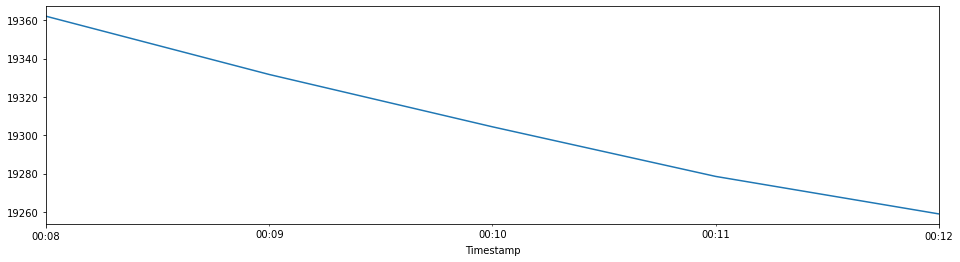

In [71]:
data.loc['Dec 18th 2017 00:08:00':'Dec 18th 2017 00:12:00', 'Weighted_Price'].plot(figsize=(16, 4));

![](https://i.imgflip.com/29iucd.jpg)

##### A few minutes pass... 

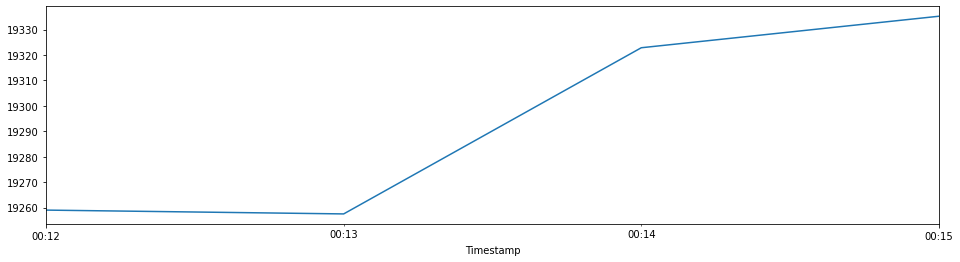

In [72]:
data.loc['Dec 18th 2017 00:12:00':'Dec 18th 2017 00:15:00', 'Weighted_Price'].plot(figsize=(16, 4));

![](https://i.redditmedia.com/VE5dgdjQ8FKZ47gdxJdQ07q36bsZVyhvAmllvLdtTnI.jpg?w=534&s=ce869cd0d8630cd420af7fa72b3c296d)

##### A few more minutes... 

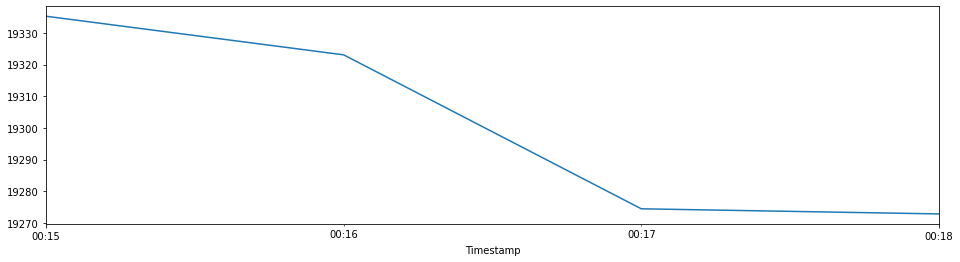

In [73]:
data.loc['Dec 18th 2017 00:15:00':'Dec 18th 2017 00:18:00', 'Weighted_Price'].plot(figsize=(16, 4));

![](https://i.imgflip.com/29iucd.jpg)

I think you get the picture. What's going on is that we're being extremely reactive to noise, and missing the underlying process. What is in fact going on is that we are in a free-fall, but it might not be obvious unless we look at the slightly broader picture. 

In other words, assuming there is an underlying process, we can assume the recent past should carry some weight. How much weight? A rolling [window](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html) of weight! 

#### The first hour of Dec 18th 2017, as seen by traders

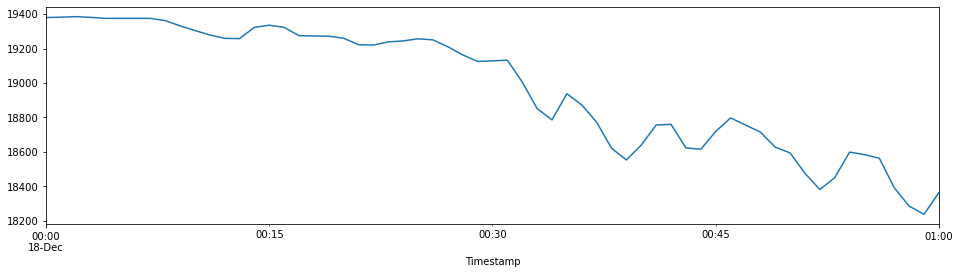

In [74]:
data.loc['Dec 18th 2017 00:00:00':'Dec 18th 2017 01:00:00', 'Weighted_Price'].plot(figsize=(16, 4));

#### The first hour of Dec 18th 2017, as seen by a rolling window of 10 minutes

In [79]:
# this is just the raw data, so we can apply a rolling window on it  
first_hour = data.loc['Dec 18th 2017 00:00:00':'Dec 18th 2017 01:00:00', 'Weighted_Price']

# notice the window size as a parameter of rolling, feel free to mess around with that parameter 
# and the center set to False. That's because we don't want to use data from the future! 
# Also notice how we use the mean. We can use many others. Try changing it! 
window_size = 5
first_hour_rolling_window = first_hour.rolling(window=window_size, center=False).mean()

What do these look like? A rolling window of 10 basically calculates the average bitcoin price in 10 minutes interval (so the average price between 00:00 and 00:10, the average price between 00:01 and 00:11, the avg price between 00:02 and 00:12, etc)

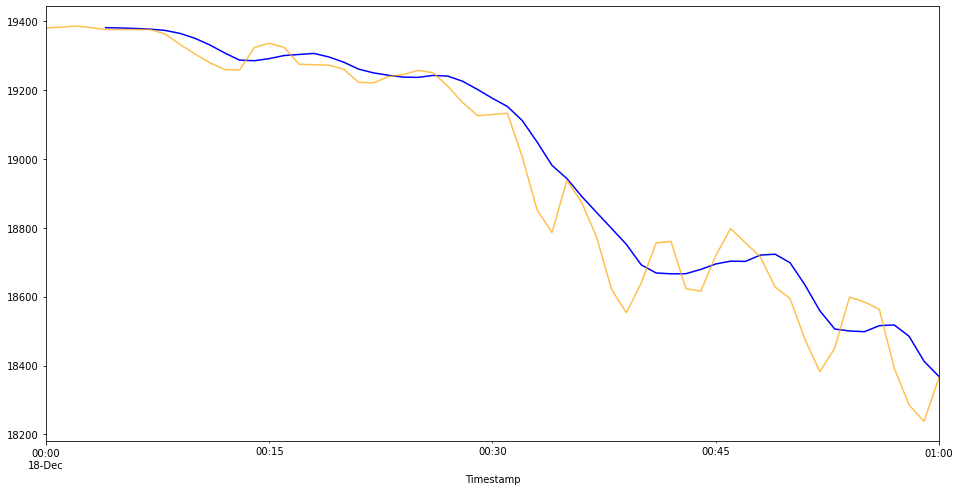

In [80]:
# Let's plot these together 
first_hour_rolling_window.plot(figsize=(16, 8), 
                               color='b',
                               label=f'rolling_window = {window_size}');
first_hour.plot(figsize=(16, 8), label='raw data', alpha=.7, ls='-', color='orange');

### <font color='#eb3483'> Quick Knowledge Check</font>
1. Can you get the maximum close price in a rolling window of 2 weeks?

<AxesSubplot:xlabel='Timestamp'>

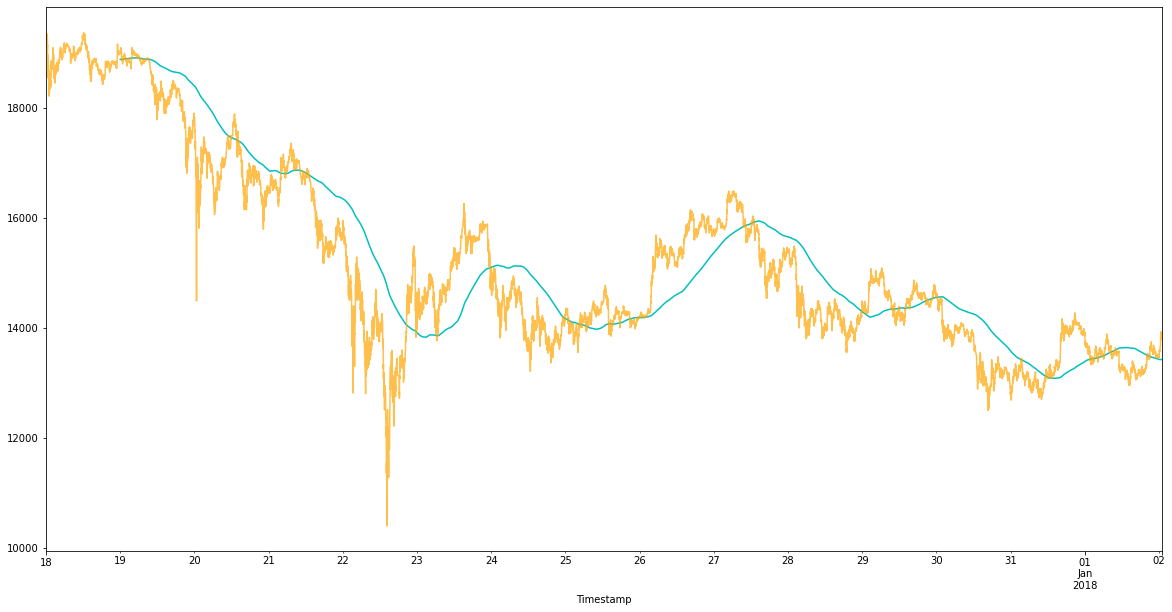

In [93]:
two_weeks = data.loc['Dec 18th 2017 00:00:00':'Jan 2 2018 01:00:00', 'Close']
window_size = 1440
two_weeks_rolling_window = two_weeks.rolling(window=window_size, center=False).mean()
two_weeks_rolling_window.plot(figsize=(16, 8), 
                               color='c',
                               label=f'rolling_window = {window_size}');
two_weeks.plot(figsize=(20, 10), label='raw data', alpha=.7, ls='-', color='orange')